# New Section

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.max_rows', 50)

In [135]:
df_final=pd.read_csv("/content/df_final_dataset.csv")
df_final.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Unnamed: 0_y,zone,borough,Longitude,Latitude
0,0,6231997,888378,2,2019-09-05 19:46:09,2019-09-05 20:00:48,1.0000,1.3900,1.0000,N,68,114,1,10.5000,1.0000,0.5000,2.9600,0.0000,0.3000,17.7600,2.5000,NaN,67.0000,East Chelsea,Manhattan,-73.9999,40.7484
1,1,1088077,5496027,2,2019-02-22 22:28:17,2019-02-22 23:00:21,1.0000,9.3700,1.0000,N,138,164,1,33.0000,0.5000,0.5000,10.6400,5.7600,0.3000,53.2000,2.5000,NaN,137.0000,LaGuardia Airport,Queens,-73.8736,40.7744
2,2,3706354,4223553,1,2019-05-17 14:26:30,2019-05-17 14:36:02,1.0000,1.2000,1.0000,N,234,114,1,7.5000,2.5000,0.5000,2.1500,0.0000,0.3000,12.9500,2.5000,NaN,233.0000,Union Sq,Manhattan,-73.9905,40.7403
3,3,6961799,6623830,2,2019-10-29 19:31:30,2019-10-29 19:46:15,3.0000,1.5900,1.0000,N,237,170,2,10.5000,1.0000,0.5000,0.0000,0.0000,0.3000,14.8000,2.5000,NaN,236.0000,Upper East Side South,Manhattan,-73.9656,40.7686
4,4,5258764,5299853,2,2019-08-28 02:56:04,2019-08-28 03:11:41,1.0000,2.4200,1.0000,N,129,260,2,12.0000,0.5000,0.5000,0.0000,0.0000,0.3000,13.3000,0.0000,NaN,128.0000,Jackson Heights,Queens,-73.8853,40.7573


In [136]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.01, 0.05, 0.50, 0.75, 0.95, 0.99, 1]).T)

In [137]:
check_df(df_final)

##################### Shape #####################
(973132, 27)
##################### Types #####################
Unnamed: 0                 int64
Unnamed: 0.1               int64
Unnamed: 0_x               int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
Unnamed: 0_y             float64
zone                      object
borough                   object
Longitude                float64
Latitude                 floa

In [138]:
remove_cols = ["Unnamed: 0","Unnamed: 0.1","Unnamed: 0_x","Unnamed: 0_y","airport_fee","passenger_count","VendorID","extra","mta_tax","tolls_amount","fare_amount","improvement_surcharge","zone"]
df_final.drop(remove_cols, inplace=True, axis=1)

In [139]:
df_final = df_final.loc[~((df_final["RatecodeID"].isnull() == True) | (df_final["store_and_fwd_flag"].isnull() == True))]

In [140]:
df_final['store_and_fwd_flag'] = 1 * (df_final.store_and_fwd_flag.values == 'Y')

In [141]:
df_final["RatecodeID"] = df_final["RatecodeID"].astype("int")

In [142]:
df_final["RatecodeID"].value_counts()

1     933612
2      25193
5       5615
3       2269
4        763
99        47
6          7
Name: RatecodeID, dtype: int64

In [143]:
df_final = df_final.loc[~(df_final["RatecodeID"] == 99)]

In [144]:
df_final["congestion_surcharge"].value_counts()

2.5000     814024
0.0000     103457
-2.5000      1499
2.7500          7
0.7500          6
Name: congestion_surcharge, dtype: int64

In [145]:
df_final["congestion_surcharge"].isnull().sum()

48466

In [146]:
df_final["congestion_surcharge"] = df_final["congestion_surcharge"].fillna(0)

In [147]:
df_final = df_final.loc[(df_final["congestion_surcharge"] == 2.5000) | (df_final["congestion_surcharge"] == 0.0000)]

In [148]:
df_final["tpep_pickup_datetime"] = pd.to_datetime(df_final["tpep_pickup_datetime"],format="%Y-%m-%d")
df_final["tpep_dropoff_datetime"] = pd.to_datetime(df_final["tpep_dropoff_datetime"],format="%Y-%m-%d")

df_final["day"] = df_final["tpep_pickup_datetime"].dt.day

df_final["pickup_day"] = df_final["tpep_pickup_datetime"].dt.day_name()

df_final["week"] = df_final["tpep_pickup_datetime"].dt.week

df_final["weekday"] = df_final["tpep_pickup_datetime"].dt.weekday

df_final["pickup_hour"] = df_final["tpep_pickup_datetime"].dt.hour

df_final["pickup_month"] = df_final["tpep_pickup_datetime"].dt.month

df_final["year"] = df_final["tpep_pickup_datetime"].dt.year

df_final["period"] = df_final["year"] * 100 + df_final["pickup_month"]

df_final["trip_n"]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [149]:
df_final["period"].value_counts()

201903    78093
201901    76318
201905    75364
201904    73919
201910    71549
201902    70136
201906    69725
201912    68442
201911    68009
201909    65341
202001    63422
201907    62716
202002    62587
201908    60319
200901        3
201812        2
202101        1
202003        1
Name: period, dtype: int64

In [150]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [151]:
df_final["pickup_timeofday"] = df_final["pickup_hour"].apply(time_of_day)

In [152]:
df_final["duration"] =(df_final["tpep_dropoff_datetime"] - df_final["tpep_pickup_datetime"]).astype('timedelta64[m]')

In [153]:
df_final["duration"] = df_final["duration"].astype("int64")

In [154]:
df_final = df_final.loc[(df_final["year"] == 2019) | (df_final["year"] == 2020)]

In [157]:
df_final = df_final.loc[~((df_final["period"] == 202003) | (df_final["period"] == 202004) | (df_final["period"] == 202005) | (df_final["period"] == 202006) | (df_final["period"] == 202007))]

In [158]:
df_final = df_final.loc[~((df_final["Latitude"].isnull() == True) | (df_final["Longitude"].isnull() == True))]

In [159]:
df_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,tip_amount,total_amount,congestion_surcharge,borough,Longitude,Latitude,day,pickup_day,week,weekday,pickup_hour,pickup_month,year,period,trip_n,pickup_timeofday,duration
0,2019-09-05 19:46:09,2019-09-05 20:00:48,1.3900,1,0,68,114,1,2.9600,17.7600,2.5000,Manhattan,-73.9999,40.7484,5,Thursday,36,3,19,9,2019,201909,1,Evening,14
1,2019-02-22 22:28:17,2019-02-22 23:00:21,9.3700,1,0,138,164,1,10.6400,53.2000,2.5000,Queens,-73.8736,40.7744,22,Friday,8,4,22,2,2019,201902,1,Late night,32
2,2019-05-17 14:26:30,2019-05-17 14:36:02,1.2000,1,0,234,114,1,2.1500,12.9500,2.5000,Manhattan,-73.9905,40.7403,17,Friday,20,4,14,5,2019,201905,1,Afternoon,9
3,2019-10-29 19:31:30,2019-10-29 19:46:15,1.5900,1,0,237,170,2,0.0000,14.8000,2.5000,Manhattan,-73.9656,40.7686,29,Tuesday,44,1,19,10,2019,201910,1,Evening,14
4,2019-08-28 02:56:04,2019-08-28 03:11:41,2.4200,1,0,129,260,2,0.0000,13.3000,0.0000,Queens,-73.8853,40.7573,28,Wednesday,35,2,2,8,2019,201908,1,Late night,15


In [160]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956824 entries, 0 to 973131
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   956824 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  956824 non-null  datetime64[ns]
 2   trip_distance          956824 non-null  float64       
 3   RatecodeID             956824 non-null  int64         
 4   store_and_fwd_flag     956824 non-null  int64         
 5   PULocationID           956824 non-null  int64         
 6   DOLocationID           956824 non-null  int64         
 7   payment_type           956824 non-null  int64         
 8   tip_amount             956824 non-null  float64       
 9   total_amount           956824 non-null  float64       
 10  congestion_surcharge   956824 non-null  float64       
 11  borough                956824 non-null  object        
 12  Longitude              956824 non-null  floa

In [161]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,"956,824.0000",2.9620,3.8622,0.0000,0.9800,1.6200,3.0000,133.5200
RatecodeID,"956,824.0000",1.0524,0.3425,1.0000,1.0000,1.0000,1.0000,6.0000
store_and_fwd_flag,"956,824.0000",0.0084,0.0913,0.0000,0.0000,0.0000,0.0000,1.0000
PULocationID,"956,824.0000",162.3488,65.4783,1.0000,114.0000,162.0000,232.0000,263.0000
DOLocationID,"956,824.0000",160.9035,69.9032,1.0000,107.0000,162.0000,233.0000,265.0000
payment_type,"956,824.0000",1.2834,0.4712,1.0000,1.0000,1.0000,2.0000,4.0000
tip_amount,"956,824.0000",2.1983,2.8415,-10.5600,0.0000,1.8600,2.9500,600.0000
total_amount,"956,824.0000",18.9192,14.5089,-109.9200,11.1600,14.6300,20.3000,700.3000
congestion_surcharge,"956,824.0000",2.1172,0.9003,0.0000,2.5000,2.5000,2.5000,2.5000
Longitude,"956,824.0000",-73.9705,0.0424,-74.2335,-73.9905,-73.9786,-73.9656,-73.7110


In [162]:
def grab_col_names(df_final, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in df_final.columns if df_final[col].dtypes == "O"]

    num_but_cat = [col for col in df_final.columns if df_final[col].nunique() < cat_th and
                   df_final[col].dtypes != "O"]

    cat_but_car = [col for col in df_final.columns if df_final[col].nunique() > car_th and
                   df_final[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df_final.columns if df_final[col].dtypes != "O"  and "tpep_pickup_datetime"  not in col  and "tpep_dropoff_datetime"  not in col]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df_final.shape[0]}")
    print(f"Variables: {df_final.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [163]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_final)

Observations: 956824
Variables: 25
cat_cols: 10
num_cols: 13
cat_but_car: 0
num_but_cat: 7


In [164]:
num_cols

['trip_distance',
 'PULocationID',
 'DOLocationID',
 'tip_amount',
 'total_amount',
 'Longitude',
 'Latitude',
 'day',
 'week',
 'pickup_hour',
 'pickup_month',
 'period',
 'duration']

In [165]:
cat_cols

['borough',
 'pickup_day',
 'pickup_timeofday',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type',
 'congestion_surcharge',
 'weekday',
 'year',
 'trip_n']

In [166]:
check_df(df_final)

##################### Shape #####################
(956824, 25)
##################### Types #####################
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag                int64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
tip_amount                      float64
total_amount                    float64
congestion_surcharge            float64
borough                          object
Longitude                       float64
Latitude                        float64
day                               int64
pickup_day                       object
week                              int64
weekday                           int64
pickup_hour                       int64
pickup_month                      int64
year                              int64
period                            int64
trip_n 

In [167]:
numeric_columns=['tip_amount', 'duration', 'total_amount','trip_distance']

count   956,824.0000
mean          2.1983
std           2.8415
min         -10.5600
1%            0.0000
5%            0.0000
10%           0.0000
20%           0.0000
30%           0.0000
40%           1.3500
50%           1.8600
60%           2.1600
70%           2.6500
80%           3.2500
90%           4.7000
95%           7.0000
99%          12.2800
100%        600.0000
max         600.0000
Name: tip_amount, dtype: float64


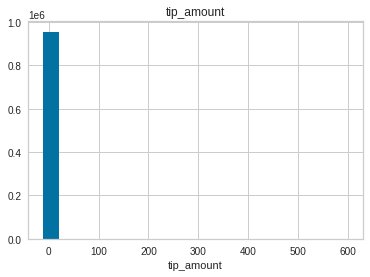

count   956,824.0000
mean         17.3330
std          70.5275
min         -57.0000
1%            1.0000
5%            3.0000
10%           4.0000
20%           5.0000
30%           7.0000
40%           9.0000
50%          11.0000
60%          13.0000
70%          16.0000
80%          20.0000
90%          28.0000
95%          37.0000
99%          62.0000
100%      1,439.0000
max       1,439.0000
Name: duration, dtype: float64


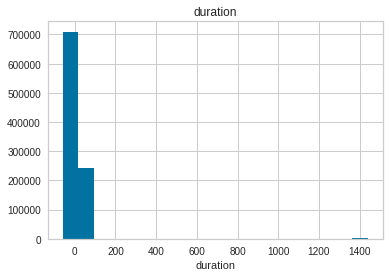

count   956,824.0000
mean         18.9192
std          14.5089
min        -109.9200
1%            5.8000
5%            7.8000
10%           8.8000
20%          10.3800
30%          11.7600
40%          12.9600
50%          14.6300
60%          16.3000
70%          18.8000
80%          22.8000
90%          33.3500
95%          50.4700
99%          73.9200
100%        700.3000
max         700.3000
Name: total_amount, dtype: float64


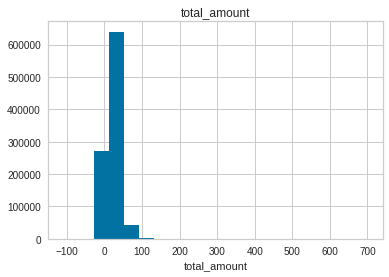

count   956,824.0000
mean          2.9620
std           3.8622
min           0.0000
1%            0.1000
5%            0.4800
10%           0.6100
20%           0.8600
30%           1.1000
40%           1.3200
50%           1.6200
60%           2.0000
70%           2.6000
80%           3.6400
90%           6.9000
95%          11.0800
99%          19.1300
100%        133.5200
max         133.5200
Name: trip_distance, dtype: float64


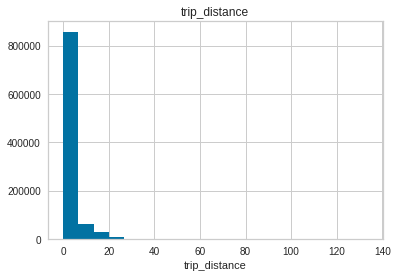

In [168]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.01,0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99,1]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in numeric_columns:
    num_summary(df_final, col, plot=True)

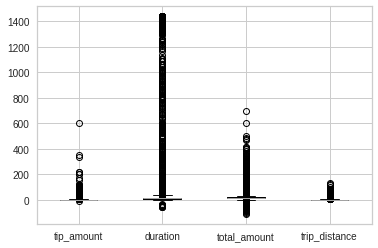

In [169]:
boxplot = df_final.boxplot(column=['tip_amount', 'duration', 'total_amount','trip_distance'])

In [170]:
def outlier_thresholds(dataframe, variable):
    low_limit = dataframe[variable].quantile(0.01)
    up_limit = dataframe[variable].quantile(0.99)
    print(variable,low_limit,up_limit)
    return low_limit, up_limit

for col in numeric_columns:
    outlier_thresholds(df_final,col)


tip_amount 0.0 12.28
duration 1.0 62.0
total_amount 5.8 73.92
trip_distance 0.1 19.13


In [171]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in numeric_columns:
    replace_with_thresholds(df_final,col)

tip_amount 0.0 12.28
duration 1.0 62.0
total_amount 5.8 73.92
trip_distance 0.1 19.13


In [172]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.01, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99,1]
    print(dataframe[numerical_col].describe(quantiles).T)

for col in numeric_columns:
    num_summary(df_final, col, plot=True)

count   956,824.0000
mean          2.1567
std           2.4212
min           0.0000
1%            0.0000
10%           0.0000
20%           0.0000
30%           0.0000
40%           1.3500
50%           1.8600
60%           2.1600
70%           2.6500
80%           3.2500
90%           4.7000
95%           7.0000
99%          12.2800
100%         12.2800
max          12.2800
Name: tip_amount, dtype: float64
count   956,824.0000
mean         13.8530
std          11.2526
min           1.0000
1%            1.0000
10%           4.0000
20%           5.0000
30%           7.0000
40%           9.0000
50%          11.0000
60%          13.0000
70%          16.0000
80%          20.0000
90%          28.0000
95%          37.0000
99%          62.0000
100%         62.0000
max          62.0000
Name: duration, dtype: float64
count   956,824.0000
mean         18.7703
std          13.3713
min           5.8000
1%            5.8000
10%           8.8000
20%          10.3800
30%          11.7600
40%         

               borough   Ratio
Manhattan       878684 91.8334
Queens           65938  6.8913
Brooklyn         10605  1.1084
Bronx             1453  0.1519
EWR                116  0.0121
Staten Island       28  0.0029
##########################################


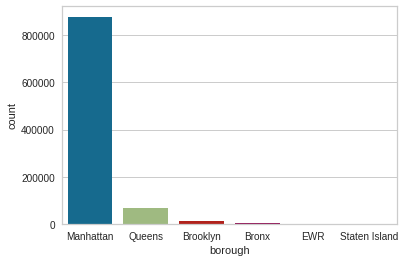

           pickup_day   Ratio
Friday         149499 15.6245
Thursday       149179 15.5911
Wednesday      143788 15.0276
Tuesday        138194 14.4430
Saturday       137150 14.3339
Monday         122723 12.8261
Sunday         116291 12.1539
##########################################


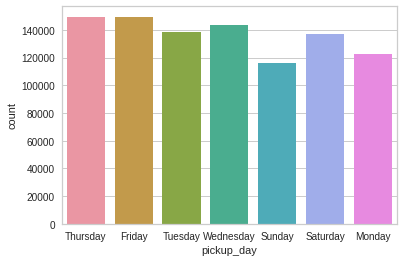

            pickup_timeofday   Ratio
Evening               339686 35.5014
Morning               234352 24.4927
Afternoon             207633 21.7002
Late night            175153 18.3057
##########################################


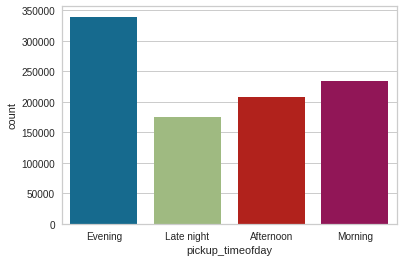

   RatecodeID   Ratio
1      924372 96.6084
2       24810  2.5930
5        4631  0.4840
3        2250  0.2352
4         755  0.0789
6           6  0.0006
##########################################


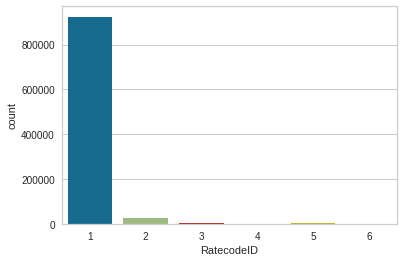

   store_and_fwd_flag   Ratio
0              948787 99.1600
1                8037  0.8400
##########################################


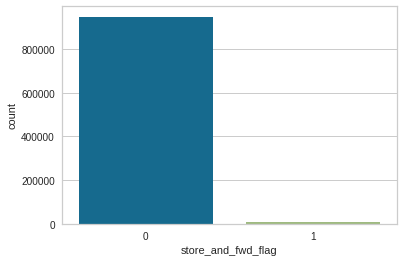

   payment_type   Ratio
1        693119 72.4396
2        257774 26.9406
3          4378  0.4576
4          1553  0.1623
##########################################


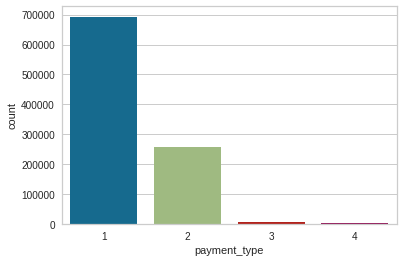

        congestion_surcharge   Ratio
2.5000                810302 84.6866
0.0000                146522 15.3134
##########################################


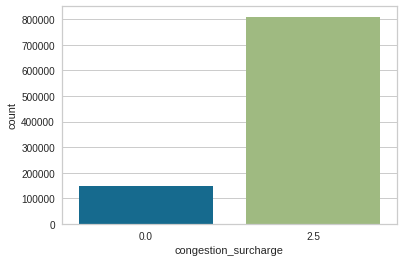

   weekday   Ratio
4   149499 15.6245
3   149179 15.5911
2   143788 15.0276
1   138194 14.4430
5   137150 14.3339
0   122723 12.8261
6   116291 12.1539
##########################################


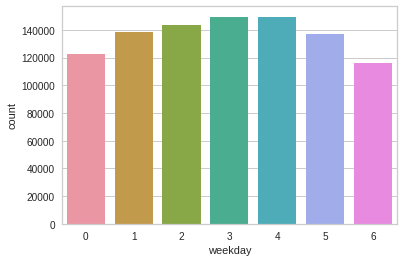

        year   Ratio
2019  831699 86.9229
2020  125125 13.0771
##########################################


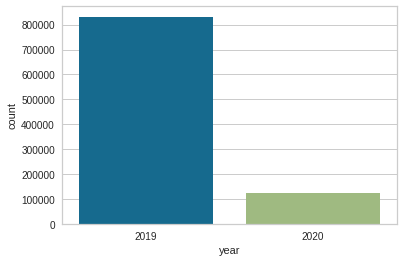

   trip_n    Ratio
1  956824 100.0000
##########################################


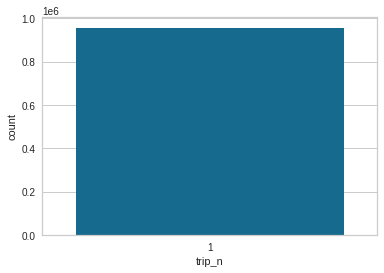

In [173]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df_final, col, plot=True)


In [174]:
line_graph_col=["pickup_month","day","pickup_day_no","week","pickup_hour","pickup_timeofday","pickup_day"]

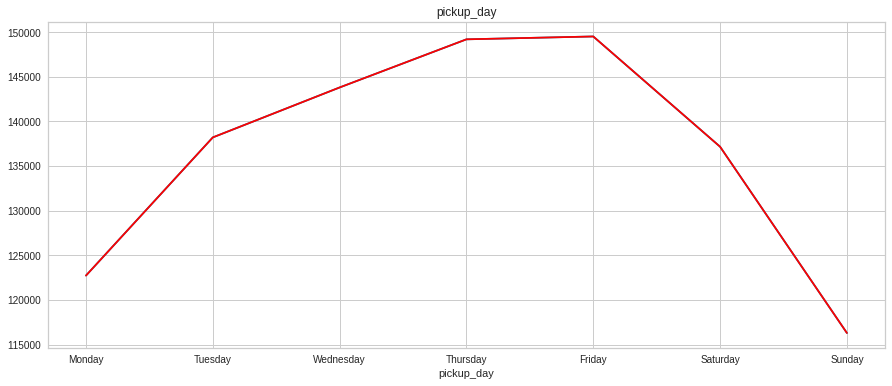

In [175]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_plot=df_final.groupby("pickup_day")["trip_n"].sum().reindex(cats)

df_plot.plot(figsize=(15, 6),)
df_plot.plot(color="red") 
plt.title("pickup_day")
plt.show()

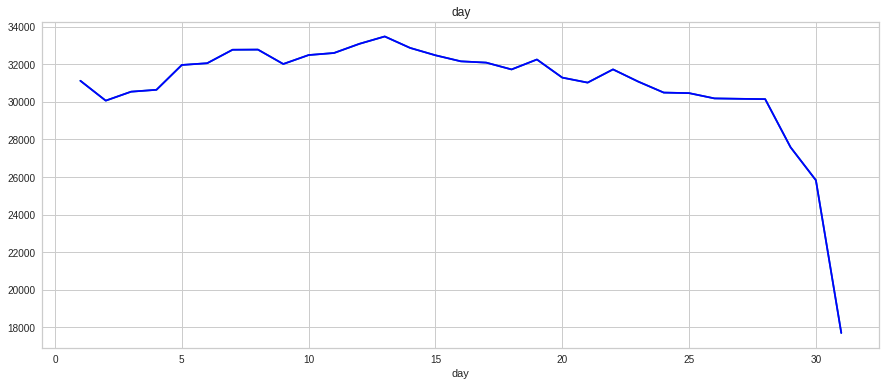

In [176]:
df_plot=df_final.groupby("day")["trip_n"].sum()

df_plot.plot(figsize=(15, 6),)
df_plot.plot(color="blue") 
plt.title("day")
plt.show()

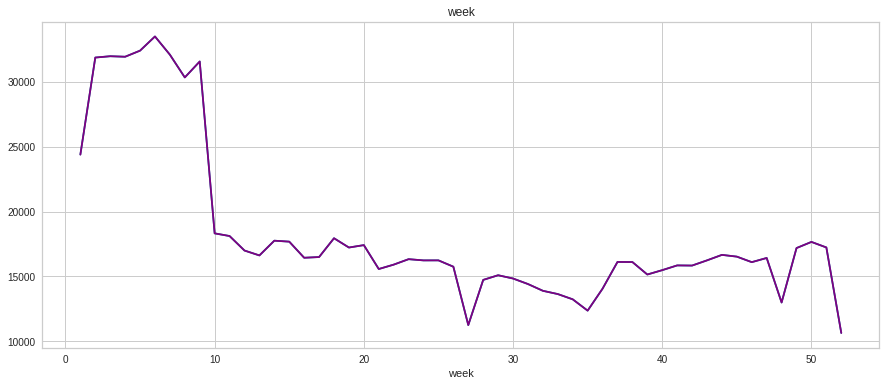

In [177]:
df_plot=df_final.groupby("week")["trip_n"].sum()

df_plot.plot(figsize=(15, 6),)
df_plot.plot(color="purple") 
plt.title("week")
plt.show()

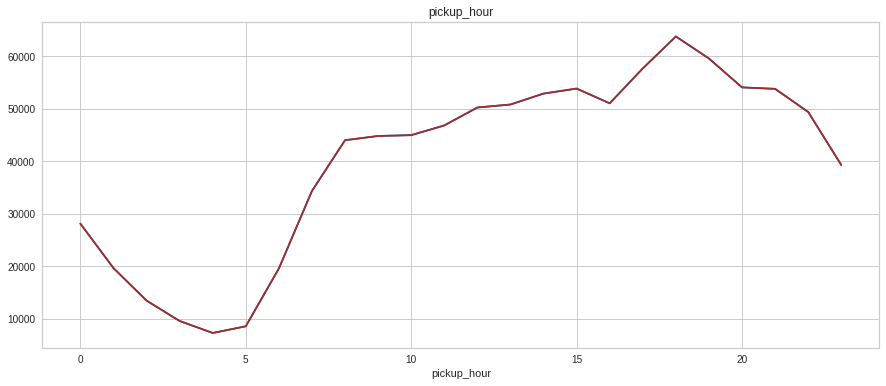

In [178]:
df_plot=df_final.groupby("pickup_hour")["trip_n"].sum()

df_plot.plot(figsize=(15, 6),)
df_plot.plot(color="brown") 
plt.title("pickup_hour")
plt.show()

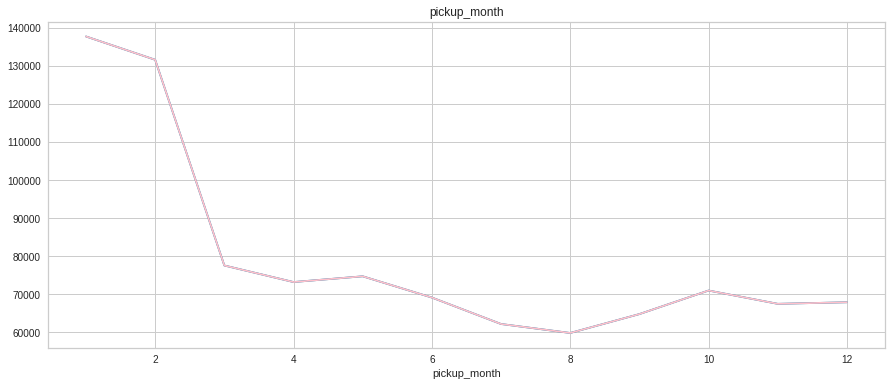

In [179]:
df_plot=df_final.groupby("pickup_month")["trip_n"].sum()

df_plot.plot(figsize=(15, 6),)
df_plot.plot(color="pink") 
plt.title("pickup_month")
plt.show()

In [180]:
def missing_values_df(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [181]:
missing_values_df(df_final,True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

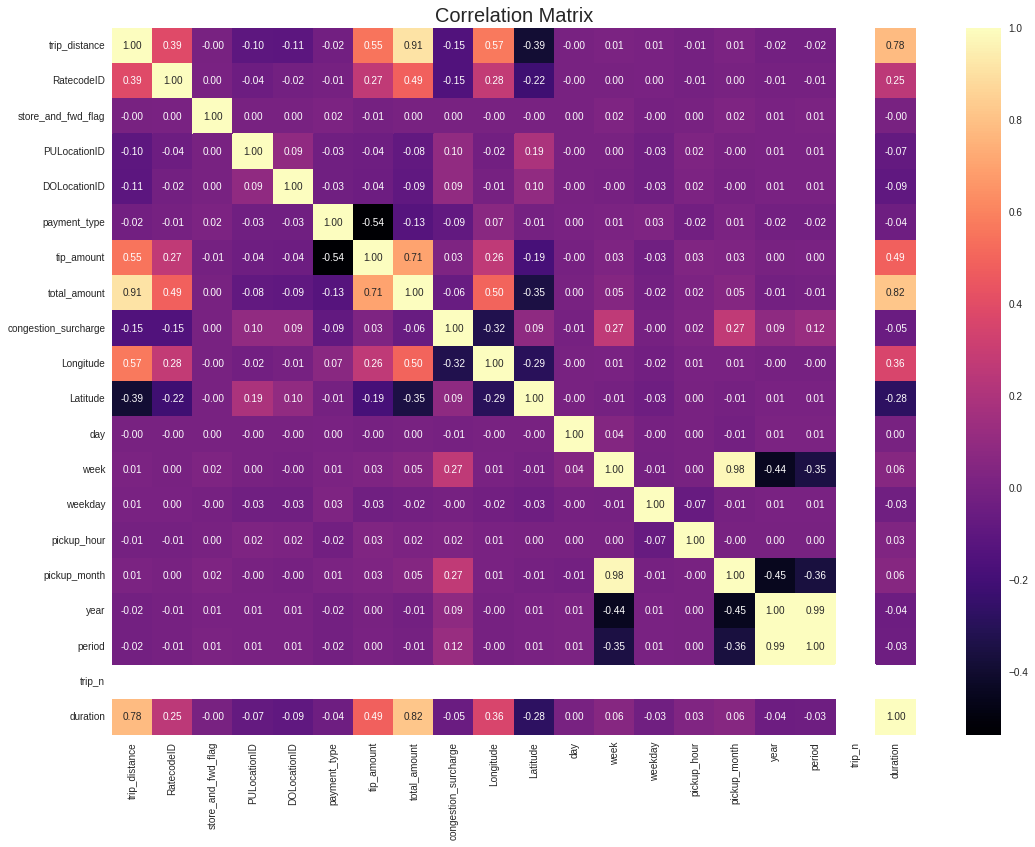

In [182]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df_final.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [183]:
remove_cols = ["week","total_amount","tip_amount","period"]
df_final.drop(remove_cols, inplace=True, axis=1)

In [184]:
def grab_col_names(df_final, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in df_final.columns if df_final[col].dtypes == "O"]

    num_but_cat = [col for col in df_final.columns if df_final[col].nunique() < cat_th and
                   df_final[col].dtypes != "O"]

    cat_but_car = [col for col in df_final.columns if df_final[col].nunique() > car_th and
                   df_final[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df_final.columns if df_final[col].dtypes != "O"  and "tpep_pickup_datetime"  not in col  and "tpep_dropoff_datetime"  not in col]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df_final.shape[0]}")
    print(f"Variables: {df_final.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [185]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_final)

Observations: 956824
Variables: 21
cat_cols: 10
num_cols: 9
cat_but_car: 0
num_but_cat: 7


In [186]:
cat_cols

['borough',
 'pickup_day',
 'pickup_timeofday',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type',
 'congestion_surcharge',
 'weekday',
 'year',
 'trip_n']

In [187]:
df_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,congestion_surcharge,borough,Longitude,Latitude,day,pickup_day,weekday,pickup_hour,pickup_month,year,trip_n,pickup_timeofday,duration
0,2019-09-05 19:46:09,2019-09-05 20:00:48,1.3900,1,0,68,114,1,2.5000,Manhattan,-73.9999,40.7484,5,Thursday,3,19,9,2019,1,Evening,14
1,2019-02-22 22:28:17,2019-02-22 23:00:21,9.3700,1,0,138,164,1,2.5000,Queens,-73.8736,40.7744,22,Friday,4,22,2,2019,1,Late night,32
2,2019-05-17 14:26:30,2019-05-17 14:36:02,1.2000,1,0,234,114,1,2.5000,Manhattan,-73.9905,40.7403,17,Friday,4,14,5,2019,1,Afternoon,9
3,2019-10-29 19:31:30,2019-10-29 19:46:15,1.5900,1,0,237,170,2,2.5000,Manhattan,-73.9656,40.7686,29,Tuesday,1,19,10,2019,1,Evening,14
4,2019-08-28 02:56:04,2019-08-28 03:11:41,2.4200,1,0,129,260,2,0.0000,Queens,-73.8853,40.7573,28,Wednesday,2,2,8,2019,1,Late night,15


In [188]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [189]:
df_final=one_hot_encoder(df_final, cat_cols)

In [190]:
df_final.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance',
       'PULocationID', 'DOLocationID', 'Longitude', 'Latitude', 'day',
       'pickup_hour', 'pickup_month', 'duration', 'borough_Brooklyn',
       'borough_EWR', 'borough_Manhattan', 'borough_Queens',
       'borough_Staten Island', 'pickup_day_Monday', 'pickup_day_Saturday',
       'pickup_day_Sunday', 'pickup_day_Thursday', 'pickup_day_Tuesday',
       'pickup_day_Wednesday', 'pickup_timeofday_Evening',
       'pickup_timeofday_Late night', 'pickup_timeofday_Morning',
       'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5',
       'RatecodeID_6', 'store_and_fwd_flag_1', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'congestion_surcharge_2.5',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'year_2020'],
      dtype='object')

In [191]:
df_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,Longitude,Latitude,day,pickup_hour,pickup_month,duration,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,store_and_fwd_flag_1,payment_type_2,payment_type_3,payment_type_4,congestion_surcharge_2.5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2020
0,2019-09-05 19:46:09,2019-09-05 20:00:48,1.3900,68,114,-73.9999,40.7484,5,19,9,14,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2019-02-22 22:28:17,2019-02-22 23:00:21,9.3700,138,164,-73.8736,40.7744,22,22,2,32,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2019-05-17 14:26:30,2019-05-17 14:36:02,1.2000,234,114,-73.9905,40.7403,17,14,5,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,2019-10-29 19:31:30,2019-10-29 19:46:15,1.5900,237,170,-73.9656,40.7686,29,19,10,14,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
4,2019-08-28 02:56:04,2019-08-28 03:11:41,2.4200,129,260,-73.8853,40.7573,28,2,8,15,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [192]:
df_final[["duration","trip_distance"]] = MinMaxScaler().fit_transform(df_final[["duration","trip_distance"]])
df_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,Longitude,Latitude,day,pickup_hour,pickup_month,duration,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,store_and_fwd_flag_1,payment_type_2,payment_type_3,payment_type_4,congestion_surcharge_2.5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2020
0,2019-09-05 19:46:09,2019-09-05 20:00:48,0.0678,68,114,-73.9999,40.7484,5,19,9,0.2131,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2019-02-22 22:28:17,2019-02-22 23:00:21,0.4871,138,164,-73.8736,40.7744,22,22,2,0.5082,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2019-05-17 14:26:30,2019-05-17 14:36:02,0.0578,234,114,-73.9905,40.7403,17,14,5,0.1311,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,2019-10-29 19:31:30,2019-10-29 19:46:15,0.0783,237,170,-73.9656,40.7686,29,19,10,0.2131,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
4,2019-08-28 02:56:04,2019-08-28 03:11:41,0.1219,129,260,-73.8853,40.7573,28,2,8,0.2295,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [193]:
remove_cols = ["tpep_pickup_datetime","tpep_dropoff_datetime","PULocationID","DOLocationID","Longitude","Latitude","day","pickup_hour","pickup_month"]
df_deneme=df_final.drop(remove_cols, axis=1)

In [194]:
df_deneme.head()

,trip_distance,duration,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,store_and_fwd_flag_1,payment_type_2,payment_type_3,payment_type_4,congestion_surcharge_2.5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2020
0,0.0678,0.2131,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0.4871,0.5082,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.0578,0.1311,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0.0783,0.2131,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
4,0.1219,0.2295,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


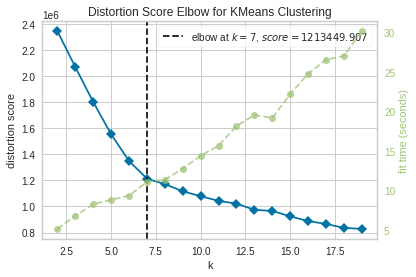

In [195]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df_deneme)
elbow.show()

In [196]:
df_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,Longitude,Latitude,day,pickup_hour,pickup_month,duration,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,store_and_fwd_flag_1,payment_type_2,payment_type_3,payment_type_4,congestion_surcharge_2.5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2020
0,2019-09-05 19:46:09,2019-09-05 20:00:48,0.0678,68,114,-73.9999,40.7484,5,19,9,0.2131,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2019-02-22 22:28:17,2019-02-22 23:00:21,0.4871,138,164,-73.8736,40.7744,22,22,2,0.5082,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2019-05-17 14:26:30,2019-05-17 14:36:02,0.0578,234,114,-73.9905,40.7403,17,14,5,0.1311,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,2019-10-29 19:31:30,2019-10-29 19:46:15,0.0783,237,170,-73.9656,40.7686,29,19,10,0.2131,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
4,2019-08-28 02:56:04,2019-08-28 03:11:41,0.1219,129,260,-73.8853,40.7573,28,2,8,0.2295,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [197]:
Longitude = list(df_final.Longitude)
Latitude = list(df_final.Latitude)

In [198]:
loc_df = pd.DataFrame()
loc_df['Longitude'] = Longitude
loc_df['Latitude'] = Latitude

In [199]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=11, batch_size=10000, random_state = 42).fit(loc_df) #fit to 15 clusters using all coordinates
loc_df['label'] = kmeans.labels_

In [200]:
loc_df.head()

,Longitude,Latitude,label
0,-73.9999,40.7484,8
1,-73.8736,40.7744,3
2,-73.9905,40.7403,1
3,-73.9656,40.7686,5
4,-73.8853,40.7573,3


In [201]:
loc_df["label"].value_counts()

6     204337
1     170912
5     170752
4     108276
8      66023
7      65744
0      55954
9      48105
2      32795
3      27858
10      6068
Name: label, dtype: int64

In [202]:
df_final['pickup_cluster'] = kmeans.predict(df_final[["Longitude","Latitude"]])

In [203]:
df_final['pickup_cluster'].value_counts()

6     204337
1     170912
5     170752
4     108276
8      66023
7      65744
0      55954
9      48105
2      32795
3      27858
10      6068
Name: pickup_cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


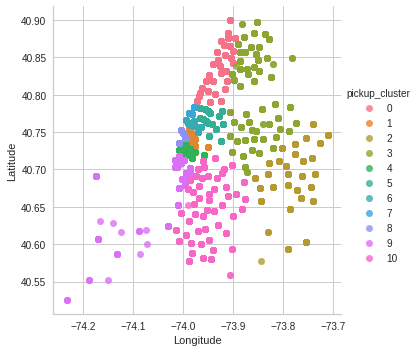

In [204]:
facet = sns.lmplot(data=df_final, x='Longitude', y='Latitude', hue='pickup_cluster', 
                   fit_reg=False, legend=True, legend_out=True)

In [205]:
cluster_len = len(df_final["pickup_cluster"].value_counts())
cluster_len

11

In [206]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-73.9605375 ,  40.79926583],
       [-73.98594194,  40.74535204],
       [-73.78677153,  40.64885412],
       [-73.87394545,  40.7731633 ],
       [-73.99474661,  40.72742357],
       [-73.95774693,  40.77281481],
       [-73.97882775,  40.75927042],
       [-73.98149945,  40.77800362],
       [-74.00145395,  40.74615853],
       [-74.00874016,  40.71000079],
       [-73.9567196 ,  40.67826745]])

In [87]:
import folium
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][1],cluster_centers[i][0])), popup=(str(cluster_centers[i][1])+str(cluster_centers[i][0]))).add_to(map_osm)
map_osm


In [207]:
df_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,Longitude,Latitude,day,pickup_hour,pickup_month,duration,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,store_and_fwd_flag_1,payment_type_2,payment_type_3,payment_type_4,congestion_surcharge_2.5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2020,pickup_cluster
0,2019-09-05 19:46:09,2019-09-05 20:00:48,0.0678,68,114,-73.9999,40.7484,5,19,9,0.2131,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,8
1,2019-02-22 22:28:17,2019-02-22 23:00:21,0.4871,138,164,-73.8736,40.7744,22,22,2,0.5082,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3
2,2019-05-17 14:26:30,2019-05-17 14:36:02,0.0578,234,114,-73.9905,40.7403,17,14,5,0.1311,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,2019-10-29 19:31:30,2019-10-29 19:46:15,0.0783,237,170,-73.9656,40.7686,29,19,10,0.2131,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,5
4,2019-08-28 02:56:04,2019-08-28 03:11:41,0.1219,129,260,-73.8853,40.7573,28,2,8,0.2295,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3


In [208]:
df_final.shape

(956824, 43)

In [209]:
df_final["trip_n"]=1

In [210]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956824 entries, 0 to 973131
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   tpep_pickup_datetime         956824 non-null  datetime64[ns]
 1   tpep_dropoff_datetime        956824 non-null  datetime64[ns]
 2   trip_distance                956824 non-null  float64       
 3   PULocationID                 956824 non-null  int64         
 4   DOLocationID                 956824 non-null  int64         
 5   Longitude                    956824 non-null  float64       
 6   Latitude                     956824 non-null  float64       
 7   day                          956824 non-null  int64         
 8   pickup_hour                  956824 non-null  int64         
 9   pickup_month                 956824 non-null  int64         
 10  duration                     956824 non-null  float64       
 11  borough_Brooklyn          

In [211]:
df_final["tpep_pickup_date"] = pd.to_datetime(df_final["tpep_pickup_datetime"]).dt.date

In [212]:
df2= pd.DataFrame(df_final.groupby("tpep_pickup_date")["trip_n"].sum())
df2

,trip_n
tpep_pickup_date,
2019-01-01,1838
2019-01-02,1921
2019-01-03,2165
2019-01-04,2404
2019-01-05,2375
...,...
2020-02-25,2297
2020-02-26,2221
2020-02-27,2515


In [213]:
df2 = df2.sort_index()

In [214]:
df2.reset_index(inplace=True)

In [215]:
df2["tpep_pickup_date"] = pd.to_datetime(df2["tpep_pickup_date"])

In [216]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [99]:
df2

,tpep_pickup_date,trip_n
0,2019-01-01,1838
1,2019-01-02,1921
2,2019-01-03,2165
3,2019-01-04,2404
4,2019-01-05,2375
...,...,...
360,2019-12-27,1637
361,2019-12-28,1671
362,2019-12-29,1592
363,2019-12-30,1668


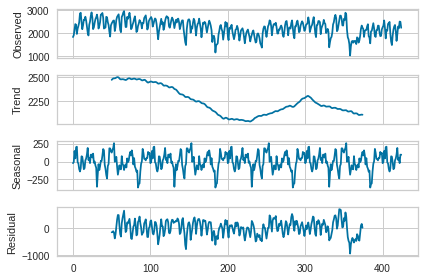

<Figure size 720x432 with 0 Axes>

In [217]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(df2.trip_n, model='additive',freq=100)
result.plot()
pyplot.figure(figsize = (10,6))
pyplot.show()

In [218]:
train=df2.loc[df2["tpep_pickup_date"]<'2020-02-01']
test=df2.loc[df2["tpep_pickup_date"]>'2020-01-31']

In [219]:
train

,tpep_pickup_date,trip_n
0,2019-01-01,1838
1,2019-01-02,1921
2,2019-01-03,2165
3,2019-01-04,2404
4,2019-01-05,2375
...,...,...
391,2020-01-27,1843
392,2020-01-28,2135
393,2020-01-29,2147
394,2020-01-30,2338


In [220]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.trip_n,trend='mul', seasonal='mul', seasonal_periods=364).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [221]:
test_pred=hwmodel.forecast(30)

In [222]:
test_pred

396   2,193.4549
397   1,853.0778
398   1,943.4272
399   2,085.2756
400   2,361.5011
401   2,371.5987
402   2,418.3418
403   2,248.4008
404   1,849.6221
405   1,868.1407
406   1,885.1714
407   2,273.4379
408   2,254.2812
409   2,074.9166
410   1,972.2152
411   1,731.9542
412   1,551.2178
413   1,950.2970
414   2,027.8377
415   2,074.6099
416   2,125.4545
417   2,131.2489
418   1,747.2343
419   1,894.5922
420   2,150.6751
421   2,261.3350
422   2,307.1587
423   2,351.1331
424   2,077.1432
425   1,782.5926
dtype: float64

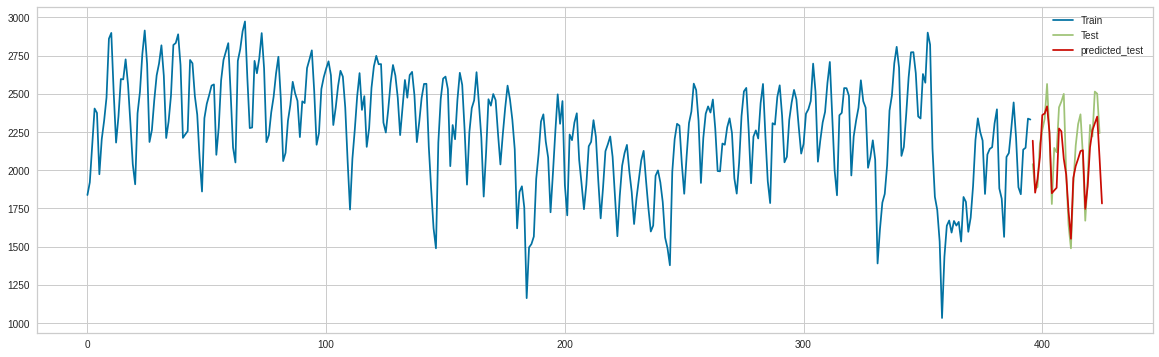

In [223]:
train['trip_n'].plot(legend=True, label='Train', figsize=(20,6))
test['trip_n'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

In [224]:
df4= pd.DataFrame(df_final.groupby(["tpep_pickup_date","pickup_hour","day","pickup_month","pickup_cluster"])["trip_n"].sum())
df4

trip_n
tpep_pickup_date pickup_hour day pickup_month pickup_cluster        
2019-01-01       0           1   1            0                    8
                                              1                   20
                                              3                    2
                                              4                   39
                                              5                   22
...                                                              ...
2020-02-29       23          29  2            6                   30
                                              7                   14
                                              8                   12
                                              9                    3
                                              10                   2

[97780 rows x 1 columns]

In [226]:
df4.reset_index(inplace=True)

In [227]:
df4["tpep_pickup_date"] = pd.to_datetime(df4["tpep_pickup_date"])

In [229]:
df4

,tpep_pickup_date,pickup_hour,day,pickup_month,pickup_cluster,trip_n
0,2019-01-01,0,1,1,0,8
1,2019-01-01,0,1,1,1,20
2,2019-01-01,0,1,1,3,2
3,2019-01-01,0,1,1,4,39
4,2019-01-01,0,1,1,5,22
...,...,...,...,...,...,...
97775,2020-02-29,23,29,2,6,30
97776,2020-02-29,23,29,2,7,14
97777,2020-02-29,23,29,2,8,12
97778,2020-02-29,23,29,2,9,3


In [230]:
train = df4.loc[(df4["tpep_pickup_date"] < "2020-02-01"), :]
val = df4.loc[(df4["tpep_pickup_date"] >= "2020-02-01"), :]

In [231]:
cols = [col for col in train.columns if col not in ['tpep_pickup_date', 'trip_n']]

In [232]:
Y_train = train['trip_n']
X_train = train[cols]

Y_val = val['trip_n']
X_val = val[cols]

In [236]:
%%time
import lightgbm as lgb
def model(train_x,train_y,test_x,test_y,col):
    params = {
        'nthread': 10,
         'max_depth': 5,
#         'max_depth': 9,
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression_l1',
        'metric': 'mape', # this is abs(a-e)/max(1,a)
#         'num_leaves': 39,
        'num_leaves': 64,
        'learning_rate': 0.2,
       'feature_fraction': 0.9,
#         'feature_fraction': 0.8108472661400657,
#         'bagging_fraction': 0.9837558288375402,
       'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 3.097758978478437,
        'lambda_l2': 2.9482537987198496,
#       'lambda_l1': 0.06,
#       'lambda_l2': 0.1,
        'verbose': 1,
        'min_child_weight': 6.996211413900573,
        'min_split_gain': 0.037310344962162616,
        }
    
    lgb_train = lgb.Dataset(train_x,train_y)
    lgb_valid = lgb.Dataset(test_x,test_y)
    model = lgb.train(params, lgb_train, 3000, valid_sets=[lgb_train, lgb_valid],early_stopping_rounds=50, verbose_eval=50)
    y_test = model.predict(val[cols])
    return y_test,model

CPU times: user 9.93 ms, sys: 2.98 ms, total: 12.9 ms
Wall time: 81.8 ms


In [237]:
cols

['pickup_hour', 'day', 'pickup_month', 'pickup_cluster']

In [238]:
%%time
y_test, model = model(X_train,Y_train,X_val,Y_val,col)

Training until validation scores don't improve for 50 rounds.
[50]	training's mape: 0.511865	valid_1's mape: 0.666186
[100]	training's mape: 0.493037	valid_1's mape: 0.656036
[150]	training's mape: 0.486948	valid_1's mape: 0.650123
Early stopping, best iteration is:
[140]	training's mape: 0.487598	valid_1's mape: 0.648818
CPU times: user 5.57 s, sys: 1.93 s, total: 7.49 s
Wall time: 2.96 s


In [239]:
print(train.shape)
print(test.shape)

if train.shape[0] != test.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(91300, 6)
(29, 2)
X and y rows are mismatched, check dataset again


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, test_pred)

ValueError: ignored

In [ ]:
def get_sarima_params(data):
  p = d = q = range(0, 2)
  pdq = list(itertools.product(p, d, q))
  seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
  result_table = pd.DataFrame(columns=['pda','seasonal_pda','aic'])

  for param in pdq:
      for param_seasonal in seasonal_pdq:
          try:
            mod = sm.tsa.statespace.SARIMAX(data,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            result_table = result_table.append({'pda':param, 'seasonal_pda':param_seasonal, 'aic':results.aic},ignore_index=True)
          except:
            continue

  optimal_params = result_table[result_table['aic']==result_table.aic.min()]
  order = optimal_params.pda.values[0]
  seasonal_order = optimal_params.seasonal_pda.values[0]
  return (order,seasonal_order)

In [ ]:
def apply_sarimax(train_data,train_exog, test_data, test_exog , order , seasonal_order):
  print('SARIMAX MODEL ORDERS ARE = {} {} '.format(order,seasonal_order))
   
  mod = sm.tsa.statespace.SARIMAX(train_data,exog=train_exog,order=order,seasonal_order=seasonal_order)
  results = mod.fit()
  
  pred = results.get_prediction(start=train_data.index[0],end=train_data.index[-1],exog=train_exog,dynamic=False)
  train_forecast = pred.predicted_mean.round()
  train_forecast[train_forecast<0] = 0


  pred1 = results.get_prediction(start=test_data.index[0],end=test_data.index[-1],exog=test_exog.iloc[:-1,:],dynamic=False)
  test_forecast = pred1.predicted_mean.round()
  test_forecast[test_forecast<0] = 0

In [ ]:
def print_sarima_results(train_data,test_data,train_forecast,test_forecast):
  print('Train Mean Absolute Error:     ', mean_absolute_error(train_data , train_forecast))
  print('Train Root Mean Squared Error: ',np.sqrt(mean_squared_error(train_data , train_forecast)))
  print('Test Mean Absolute Error:      ', mean_absolute_error(test_data, test_forecast))
  print('Test Root Mean Squared Error:  ',np.sqrt(mean_squared_error(test_data, test_forecast)))

#Applying Sarimax on demand data with exogenance variables on Cluster
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    train = pd.DataFrame(train['trip_n'])
    train_exog = train.loc[:,['hour','day'	,'dayofweek',	'temperature',	'wind_speed']]
    test_data = pd.DataFrame(test['demand'])
    test_exog = test.loc[:,['hour','day'	,'dayofweek',	'temperature',	'wind_speed']]
    
    
    order,seasonal_order = get_sarima_params(train_data)
    train_forecast, test_forecast = apply_sarima(train_data,train_exog,test_data,test_exog,order,seasonal_order)  
    
    #Ignoring test data between 23-26 Jan 2016
    test_cleaned = test_data.drop(indexes) 
    test_forecast_cleaned = test_forecast.drop(indexes)
    
    print_sarima_results(train_data,test_cleaned,train_forecast, test_forecast_cleaned)


KeyError: ignored